# __Predicting Burned Calories on Workout__


<p align="center">
  <img src="https://github.com/rymyf/Predict_Calories_Regression/blob/main/pics/rock-art-craft-wellness.jpg?raw=true" alt="Material Bread logo">
</p>


## __Contents:__
> 1. Overview
> 2. Installation
> 3. Read the dataset
> 4. Explore Information
> 5. Cleaning the dataset
>> 1. Handling whitespaces
>> 2. Handling the Missing Values
>> 3. Handling the Outliers
>> 4. Export the cleaned dataset
> 6. Explore Data Analysis
>> 1. Questions & Answers


---


## __Overview:__

In this project we take the dataset from kaggle [here](https://www.kaggle.com/emdemor/predicting-burned-calories-on-workout/data)


---

## __Installation:__

In [4]:
# !pip install plotly_express

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

---

## __Read the Dataset:__

In [6]:
# Import Calories Dataset
df_cal = pd.read_csv('data/calories.csv')

# Import Exercises Dataset
df_ex  = pd.read_csv('data/exercise.csv')

# Merging Datasets
df = pd.merge(df_ex, df_cal, on = 'User_ID')
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

---

## __Explore Information:__

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [8]:
df.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

In [9]:
df.size

135000

In [10]:
df.shape

(15000, 9)

In [11]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [12]:
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [13]:
df.Gender.value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [14]:
df.Age.nunique()

60

In [15]:
df.Age.unique()

array([68, 20, 69, 34, 27, 36, 33, 41, 60, 26, 21, 66, 32, 53, 39, 46, 50,
       67, 31, 48, 29, 42, 62, 38, 25, 24, 22, 74, 70, 44, 61, 63, 54, 47,
       35, 28, 77, 64, 45, 57, 49, 40, 55, 23, 43, 52, 79, 51, 59, 30, 37,
       56, 58, 78, 73, 76, 72, 65, 71, 75])

In [16]:
df.Age.value_counts()

20    512
21    497
22    489
26    452
25    435
24    426
23    411
27    396
28    390
29    379
32    370
31    339
35    327
30    325
33    320
38    311
34    285
37    283
36    279
39    276
40    260
44    259
42    257
41    252
43    250
46    233
45    233
52    225
47    223
50    220
48    219
54    217
49    208
55    204
53    201
59    198
51    197
56    190
63    182
58    182
61    181
62    180
57    177
64    176
60    172
65    169
73    167
71    163
67    162
70    154
68    150
66    147
79    147
69    145
74    142
76    139
72    137
78    133
77    130
75    117
Name: Age, dtype: int64

In [17]:
df.sample(60)

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
4226   10643480  female   31   168.0    67.0      13.0        95.0       40.0   
12636  13534048  female   28   164.0    66.0       3.0        87.0       38.9   
12659  16845239    male   28   189.0    96.0       1.0        76.0       38.0   
13549  11456581  female   29   158.0    52.0      24.0       110.0       40.5   
2341   17045278  female   74   163.0    64.0      29.0       106.0       40.8   
1590   15149698    male   20   199.0    98.0      30.0       104.0       41.0   
6288   13426579    male   35   196.0    88.0       7.0        88.0       39.6   
3536   11860323  female   54   153.0    52.0       9.0        92.0       39.9   
5309   15401439    male   60   194.0    99.0      22.0        98.0       40.6   
9973   11015537    male   32   205.0   111.0      16.0       102.0       40.2   
5657   14575443  female   39   164.0    65.0       4.0        85.0       38.9   
12035  16198653    male   20   192.0    90.0      17.0       104.0       40.6   
6354   11404132  female   28   164.0    60.0      19.0       103.0       40.3   
5166   16033850  female   35   180.0    78.0      12.0        98.0       40.2   
3203   18789216  female   40   146.0    49.0       3.0        83.0       38.8   
6075   15636021  female   20   170.0    66.0      18.0        99.0       40.1   
6474   15114078  female   24   161.0    61.0      12.0       104.0       40.2   
3970   13310511    male   71   191.0    94.0      19.0       101.0       40.5   
10368  19627063    male   22   193.0    88.0       8.0        87.0       39.3   
8204   13839615    male   24   189.0    97.0      18.0        99.0       40.5   
3167   17295669  female   22   153.0    55.0      21.0       107.0       41.1   
9796   12088858  female   63   161.0    59.0      12.0        89.0       40.5   
1433   10011812  female   62   148.0    50.0      10.0        93.0       39.9   
11550  12072273  female   57   160.0    67.0      27.0       109.0       40.6   
2952   11434854    male   70   180.0    77.0       9.0       100.0       40.0   
10773  11471645  female   67   153.0    54.0      26.0        97.0       40.9   
7795   15730455  female   58   171.0    73.0      15.0        97.0       40.0   
2080   12913399  female   55   157.0    57.0      27.0       101.0       40.8   
5992   19340729    male   63   180.0    85.0      10.0        93.0       39.8   
4468   19009953  female   35   166.0    63.0      13.0       101.0       39.8   
836    18890018  female   77   151.0    52.0      28.0       103.0       40.6   
7455   13303459  female   41   150.0    52.0      13.0        92.0       40.5   
9594   14494156  female   69   167.0    68.0       5.0        85.0       39.2   
14496  18334068  female   55   158.0    54.0      27.0       105.0       41.0   
9347   14666704  female   26   147.0    50.0      10.0        92.0       40.3   
8347   19159747  female   63   160.0    63.0       8.0        90.0       39.3   
2823   17841465  female   26   167.0    67.0      19.0       111.0       41.0   
6545   11644663  female   47   164.0    60.0       5.0        86.0       39.1   
14183  13039661  female   25   155.0    59.0      19.0        93.0       40.3   
8571   10908428  female   25   167.0    62.0      29.0        97.0       40.8   
1516   14043610  female   57   168.0    65.0       4.0        79.0       39.1   
4049   14675786    male   41   184.0    82.0      19.0       104.0       40.4   
4941   16376096    male   33   190.0    95.0      15.0        89.0       40.2   
13962  18400571    male   25   186.0    87.0       8.0        95.0       39.3   
2391   19018538    male   56   174.0    82.0      21.0       101.0       40.7   
4175   16042856  female   33   160.0    57.0      13.0       100.0       40.0   
479    15744897  female   69   165.0    62.0      29.0       112.0       40.9   
12653  14467216  female   65   178.0    78.0      17.0        99.0       40.5   
4177   14748337  female   37   180.0   

---

## __Cleaning the Dataset:__

### Handling whitespaces:

In [18]:
# strip whitespaces in columns
df.columns.str.strip()

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [19]:
# strip whitespaces in values of multiple columns
df['Gender'] = df['Gender'].apply(lambda x: x.strip())

### Handling the Missing Values:

In [20]:
# Check for null values
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [21]:
# Find Outliers

### Standaraized Floats

In [83]:
pd.set_option('display.float_format' ,lambda x:'%.2f' % x)

### Export the cleaned dataset:

In [22]:
df.to_csv("cleaned_exer_cal_dataset.csv")

## __Explore Data Analysis:__

### Questions & Answers:

#### 1. How can age affect performance time during a workout?

In [69]:
# Code
grouped_dur = df.groupby(['Age'] )[['Duration']].count().sort_values(ascending = False , by ='Duration')
grouped_dur

Duration
Age          
20        512
21        497
22        489
26        452
25        435
24        426
23        411
27        396
28        390
29        379
32        370
31        339
35        327
30        325
33        320
38        311
34        285
37        283
36        279
39        276
40        260
44        259
42        257
41        252
43        250
45        233
46        233
52        225
47        223
50        220
48        219
54        217
49        208
55        204
53        201
59        198
51        197
56        190
58        182
63        182
61        181
62        180
57        177
64        176
60        172
65        169
73        167
71        163
67        162
70        154
68        150
66        147
79        147
69        145
74        142
76        139
72        137
78        133
77        130
75        117

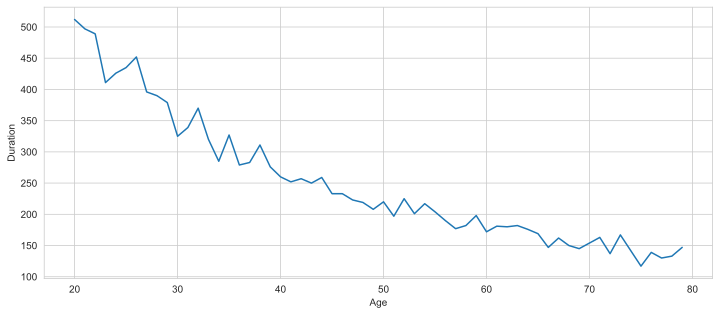

In [70]:
# Visual
plt.figure(figsize=(12, 5))
sns.lineplot(x='Age', y='Duration', palette="Blues_d", data=grouped_dur);

#### 2. What are the factors that affect how high or low heart rate during a workout?

In [81]:
# Code
heart_corr = pd.DataFrame( df.corr()['Heart_Rate'] )
heart_corr

Heart_Rate
User_ID          -0.00
Age               0.01
Height            0.00
Weight            0.00
Duration          0.85
Heart_Rate        1.00
Body_Temp         0.77
Calories          0.90

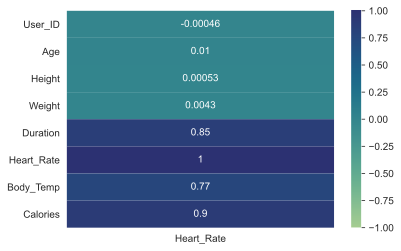

In [86]:
# Visual
sns.heatmap(heart_corr, cmap='crest', annot=True, vmin=-1, vmax=1);

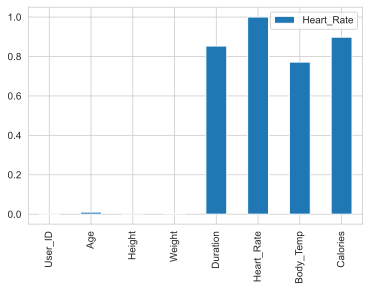

In [80]:
heart_corr.to_frame().plot.bar();

#### 3. What is the rate of burning calories compared to the time of workout?

In [88]:
# Code
duration_corr = df.Duration.corr(df.Calories)
duration_corr

0.9554205334742683

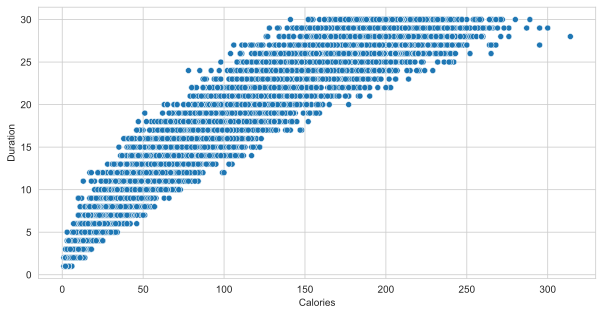

In [77]:
# Visual
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Calories", y="Duration");

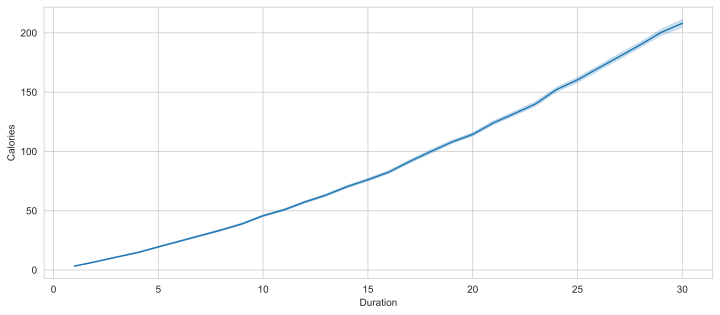

In [55]:
# Visual
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="Duration", y="Calories");

#### 4. What is the difference between male and female in the duration of workout and burned calories?

In [40]:
# Code
grouped_dur_cal = df.groupby('Gender',as_index=False)[['Duration','Calories']].mean()
grouped_dur_cal

Gender   Duration   Calories
0  female  15.502185  88.153052
1    male  15.559420  90.945750

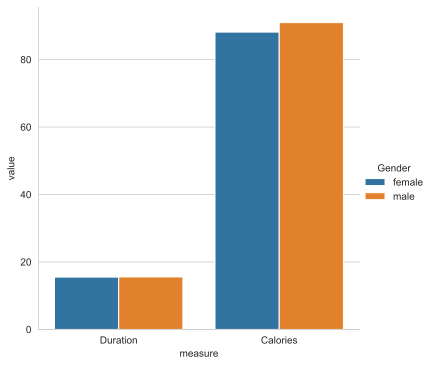

In [92]:
# Visual
reshape = {'Gender': ['female', 'female', 'male', 'male'], 'measure': ['Duration',  'Calories', 'Duration',  'Calories'], 'value':[grouped_dur_cal.values[0][1], grouped_dur_cal.values[0][2], grouped_dur_cal.values[1][1], grouped_dur_cal.values[1][2]]} 
reshape_grouped_dur_cal = pd.DataFrame(data=reshape)
reshape_grouped_dur_cal
sns.set_style("whitegrid");
sns.catplot(x='measure', y='value', hue='Gender', data=reshape_grouped_dur_cal, kind='bar');

In [45]:
# Visual
sns.relplot(data=df, x="Duration", y="Calories", hue="Gender", col="Gender");

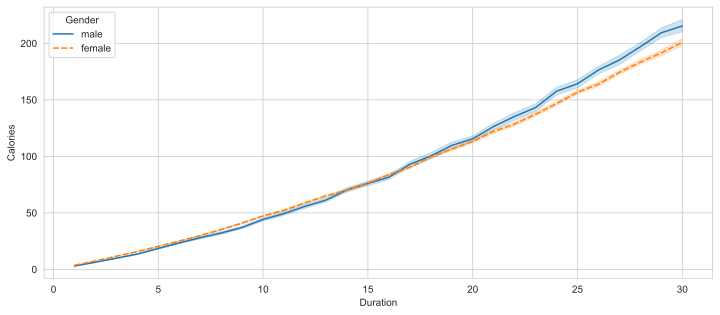

In [43]:
# Visual
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="Duration", y="Calories", hue="Gender", style="Gender");

#### 5. What is the relationship between weight and burned calories?

In [32]:
# Code
df.Weight.corr(df.Calories)

0.03548058186832146

In [44]:
# Visual
sns.scatterplot(data=df, x="Weight", y="Calories", alpha=0.5);

#### 6. What are the oldest ages that achieve high calorie burn?


In [71]:
# Code
grouped_age = df.groupby(['Age'], as_index=False )[['Calories']].count().sort_values(ascending = False , by ='Calories')
grouped_age

Age  Calories
0    20       512
1    21       497
2    22       489
6    26       452
5    25       435
4    24       426
3    23       411
7    27       396
8    28       390
9    29       379
12   32       370
11   31       339
15   35       327
10   30       325
13   33       320
18   38       311
14   34       285
17   37       283
16   36       279
19   39       276
20   40       260
24   44       259
22   42       257
21   41       252
23   43       250
25   45       233
26   46       233
32   52       225
27   47       223
30   50       220
28   48       219
34   54       217
29   49       208
35   55       204
33   53       201
39   59       198
31   51       197
36   56       190
38   58       182
43   63       182
41   61       181
42   62       180
37   57       177
44   64       176
40   60       172
45   65       169
53   73       167
51   71       163
47   67       162
50   70       154
48   68       150
46   66       147
59   79       147
49   69       145
54   74       142
56   76       139
52   72       137
58   78       133
57   77       130
55   75       117

[None, None, None]

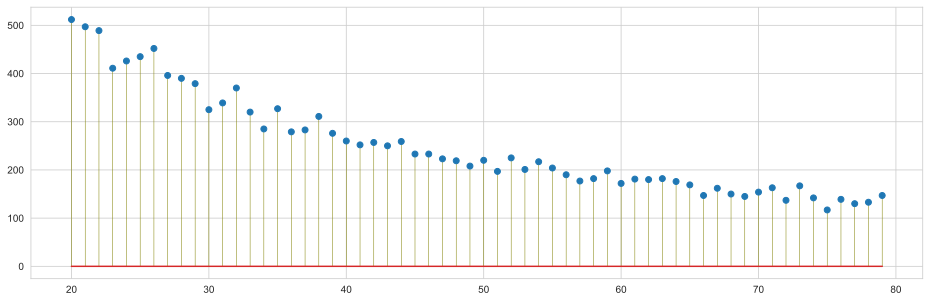

In [74]:
# Visual
plt.figure(figsize=(16, 5))
# sns.barplot(x='Age', y='Calories', data=grouped_age);
(markers, stemlines, baseline) = plt.stem(grouped_age.Age, grouped_age.Calories);
plt.setp(stemlines, linestyle="-", color="olive", linewidth=0.5 )

#### 7. What is the difference between male and female in height and weight?

In [36]:
# Code
grouped_gender = df.groupby('Gender',as_index=False)[['Height','Weight']].mean()
grouped_gender

Gender      Height     Weight
0  female  164.405931  63.274460
1    male  184.667517  86.825702

In [56]:
reshape = {'Gender': ['female', 'female', 'male', 'male'], 'measure': ['Height',  'Weight', 'Height',  'Weight'], 'value':[grouped_gender.values[0][1], grouped_gender.values[0][2], grouped_gender.values[1][1], grouped_gender.values[1][2]]} 
reshape_grouped_gender = pd.DataFrame(data=reshape)
reshape_grouped_gender

Gender measure       value
0  female  Height  164.405931
1  female  Weight   63.274460
2    male  Height  184.667517
3    male  Weight   86.825702

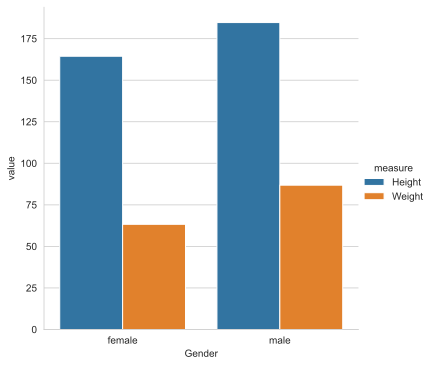

In [73]:
# Visual
sns.set_style("whitegrid")
sns.catplot(x='Gender', y='value', hue='measure', data=reshape_grouped_gender, kind='bar');
